# Gemini Pro and Gemini Pro Vision Overview

## Gemini Pro: AI Content Generation

Gemini Pro is an advanced generative AI model developed by Google Generative AI. It excels in generating high-quality content in various languages and is equipped with the capability to understand and respond to user queries.

### Generating Content in Turkish

You can utilize Gemini Pro to generate content in Turkish. In the provided code snippet, there's an example where the model is prompted with the question "Üretken Yapay Zeka nedir? Detaylı bir açıklama yap." The response is then formatted into Markdown for easy readability.

### Conversational AI with Gemini Pro

Gemini Pro can also be employed for conversational AI tasks. The code demonstrates how Gemini Pro is utilized through the `ChatGoogleGenerativeAI` class to answer questions in a clear and concise manner. For instance, it answers the question "Transformer mimarisini lise öğrencisi seviyesinde detaylı, net ve sade bir dil ile anlat."

## Gemini Pro Vision: Image Recognition

Gemini Pro Vision specializes in image recognition. By providing an image URL as input, the model can identify and describe the contents of the image. In the given example, an image URL is supplied, and Gemini Pro Vision is prompted with the question "Resimde ne görüyorsun?"

## Chat with Multi Documents and Question Answering

The code showcases a comprehensive question-answering system using a combination of different components. It loads a set of documents, creates embeddings using Google Generative AI, and sets up a question-answering chain. The prompt template guides the system to answer questions based on the provided context.

### Relevant Questions

The system can be tested with questions related to the "IMAT" exam. For example:
- "IMAT sınavı için tercihler ne zaman yapılır?"
- "IMAT sınavı zor mu?"

### Irrelevant Question

An irrelevant question is also included to demonstrate the system's ability to handle questions it does not have information about.



## Import required libraries

In [41]:
import os
from dotenv import load_dotenv
import textwrap
import requests
import io
import google.generativeai as genai
from PIL import Image 
from IPython.display import display
from IPython.display import Markdown
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings

## Set the API key

In [66]:
load_dotenv()
if 'GOOGLE_API_KEY' not in os.environ:
    raise ValueError("API key not found. Please set the GEMINI_API_KEY environment variable.")
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

### Create a helper function that will convert the markdown into nicely formatted text

In [43]:
#Create a helper function that will convert the markdown into nicely formatted text
def to_markdown(text):
  text = text.replace('•','*')
  return Markdown(textwrap.indent(text, '>', predicate=lambda _: True))

## List available models

In [44]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision


# Gemini Pro

## Create a generative model

In [45]:
model = genai.GenerativeModel('gemini-pro')

## Generate content in Turkish

In [46]:
response = model.generate_content("Üretken Yapay Zeka nedir? Detaylı bir açıklama yap.")

In [47]:
response.text

"**Üretken Yapay Zeka (Üretken AI)**\n\nÜretken Yapay Zeka (Üretken AI), insan benzeri metinler, görseller, müzik ve videolar gibi çeşitli içerik biçimleri oluşturmak için kullanılan bir Yapay Zeka (AI) türüdür. İnsan yaratıcılığını artırarak içerik geliştirme sürecini hızlandırmayı ve iyileştirmeyi amaçlar.\n\n**Çalışma Prensibi**\n\nÜretken AI, derin öğrenme ve doğal dil işleme (NLP) gibi ileri düzey makine öğrenimi tekniklerini kullanır. Büyük miktarlarda veri üzerinde eğitilen bu modeller, örüntüleri ve stilleri tanımlamayı öğrenebilir. Daha sonra bu bilgileri, yeni ve orijinal içerikler oluşturmak için kullanabilirler.\n\n**Örnekler**\n\nÜretken AI'nın yaygın olarak kullanılan bazı örnekleri şunlardır:\n\n* **Doğal Dil İşleme:** Sohbet robotları, metin oluşturma, dil çevirisi\n* **Görüntü Oluşturma:** Resim ve fotoğraf oluşturma, görüntü düzenleme\n* **Müzik Oluşturma:** Melodi ve şarkı sözü yazma, müzik düzenleme\n* **Video Oluşturma:** Videoların oluşturulması ve düzenlenmesi\n\

In [48]:
to_markdown(response.text)

>**Üretken Yapay Zeka (Üretken AI)**
>
>Üretken Yapay Zeka (Üretken AI), insan benzeri metinler, görseller, müzik ve videolar gibi çeşitli içerik biçimleri oluşturmak için kullanılan bir Yapay Zeka (AI) türüdür. İnsan yaratıcılığını artırarak içerik geliştirme sürecini hızlandırmayı ve iyileştirmeyi amaçlar.
>
>**Çalışma Prensibi**
>
>Üretken AI, derin öğrenme ve doğal dil işleme (NLP) gibi ileri düzey makine öğrenimi tekniklerini kullanır. Büyük miktarlarda veri üzerinde eğitilen bu modeller, örüntüleri ve stilleri tanımlamayı öğrenebilir. Daha sonra bu bilgileri, yeni ve orijinal içerikler oluşturmak için kullanabilirler.
>
>**Örnekler**
>
>Üretken AI'nın yaygın olarak kullanılan bazı örnekleri şunlardır:
>
>* **Doğal Dil İşleme:** Sohbet robotları, metin oluşturma, dil çevirisi
>* **Görüntü Oluşturma:** Resim ve fotoğraf oluşturma, görüntü düzenleme
>* **Müzik Oluşturma:** Melodi ve şarkı sözü yazma, müzik düzenleme
>* **Video Oluşturma:** Videoların oluşturulması ve düzenlenmesi
>
>**Faydaları**
>
>Üretken AI, çok sayıda fayda sağlar, bunlar arasında şunlar yer alır:
>
>* **İçerik Oluşturma Süresinin Kısaltılması:** Üretken AI, yazarlar, tasarımcılar ve müzisyenlerin görevlerini hızlandırarak içerik oluşturma süresini önemli ölçüde kısaltabilir.
>* **İçerik Kalitesinin Artırılması:** Üretken AI, insan benzeri içerik oluşturabilir ve hatta mevcut içerikleri iyileştirebilir. Bu, daha ilgi çekici ve etkili sonuçlar sağlayabilir.
>* **Yaratıcılığın Artırılması:** Üretken AI, insanlara yeni fikirler ve ilham vermelerine yardımcı olarak yaratıcılıklarını artırabilir.
>* **Maliyetlerin Azaltılması:** Üretken AI, insan işgücüne olan ihtiyacı azaltarak içerik geliştirme maliyetlerini düşürebilir.
>
>**Uygulamalar**
>
>Üretken AI, aşağıdakiler de dahil olmak üzere çok çeşitli uygulamalarda kullanılmaktadır:
>
>* **Pazarlama:** Ürün tanıtımları, blog gönderileri, sosyal medya metinleri
>* **Medya:** Haber makaleleri, senaryolar, müzik
>* **Eğitim:** Ders planları, çevrimiçi kurslar, test soruları
>* **Müşteri Hizmetleri:** Sohbet robotları, e-posta yanıtları, SSS bölümleri
>
>**Geleceği**
>
>Üretken AI, gelişen bir alandır ve gelecekte içerik oluşturma şeklimizi daha da dönüştürmesi beklenmektedir. Daha sofistike modeller ve daha geniş uygulamalar, yaratıcı endüstriler ve ötesinde devrim niteliğinde değişikliklere yol açabilir.

# Chat with Gemini Pro

## Create a ChatGoogleGenerativeAI instance

In [49]:
llm = ChatGoogleGenerativeAI(model="gemini-pro", google_api_key=GOOGLE_API_KEY)

result = llm.invoke("Transformer mimarisini lise öğrencisi seviyesinde detaylı, net ve sade bir dil ile anlat.")

to_markdown(result.content)

>**Transformer Mimarisi**
>
>Transformer, metin işleme ve doğal dil işleme görevlerinde kullanılan bir sinir ağı türüdür. İşte lise öğrencisi seviyesinde sade bir açıklama:
>
>**Dikkat Mekanizması:**
>Transformer'ın en önemli özelliği "dikkat mekanizmasıdır". Bu mekanizma, modelin bir cümle veya metindeki belirli kelimelere odaklanmasını sağlar.
>
>**Kodlayıcı ve Kod Çözücü:**
>Transformer, iki ana bileşenden oluşur: kodlayıcı ve kod çözücü. Kodlayıcı, metni bir dizi sayıya dönüştürürken, kod çözücü bu sayıları tekrar metne dönüştürür.
>
>**Kodlayıcı:**
>* Metni kelimelere ayırır ve her kelimeye bir sayı atar.
>* Dikkat mekanizmasını kullanarak metindeki önemli kelimelere odaklanır.
>* Bu bilgileri, metnin sayısal bir temsilini oluşturan bağlamsal gömülümler olarak kaydeder.
>
>**Kod Çözücü:**
>* Bağlamsal gömülümleri alır ve bunları kelime tahminleri oluşturmak için kullanır.
>* Dikkat mekanizmasını kullanarak, bir sonraki kelimeyi tahmin etmek için metnin daha önceki kısımlarına odaklanır.
>* Son kelimeyi tahmin edene kadar bu işlemi tekrarlar.
>
>**Çalışma Prensibi:**
>Transformer, bir metin dizisini alır ve bunu bir dizi sayıya dönüştürür. Ardından, bu sayılar üzerinde dikkat mekanizmasını kullanarak, metnin önemli kısımlarına odaklanır. Son olarak, metni tekrar oluşturmak için bu bilgileri kullanır.
>
>**Kullanım Alanları:**
>Transformer, şu anda aşağıdakiler de dahil olmak üzere çeşitli doğal dil işleme görevlerinde kullanılmaktadır:
>
>* Makine çevirisi
>* Metin özeti
>* Soru cevaplama
>* Metin sınıflandırması

# **Gemini** **Pro** **Vision**

### Create show_image function to display the image

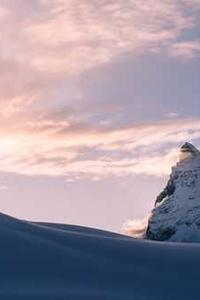

In [50]:
def show_image(url):
  response = requests.get(url)
  image = Image.open(io.BytesIO(response.content))
  display(image)

show_image("https://picsum.photos/seed/picsum/200/300")

### Create a HumanMessage instance

In [51]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision",temperature = 0.3)

message = HumanMessage(
    content=[
        {
            "type":"text",
            "text":"Resimde ne görüyorsun?"
        },
        {
            "type":"image_url",
            "image_url": "https://picsum.photos/seed/picsum/200/300"
        }
    ]
)


### Invoke the model with the message

In [52]:
llm.invoke([message])

AIMessage(content=' Resimde karla kaplı bir dağ görüyorum. Dağın tepesi bulutların arasına gizlenmiş. Dağın etekleri ise karla kaplı. Güneş dağın arkasından doğuyor ve gökyüzünü pembe ve turuncu renklere boyuyor.')

# **Chat** **with** **Multi Documents**

## Import required libraries

In [53]:
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain.document_loaders import PyPDFDirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma

## Load the documents

In [54]:
loader = PyPDFDirectoryLoader("pdfs")
data = loader.load_and_split()

### Combine the context

In [55]:
context = "\n".join(str(p.page_content) for p in data)

In [56]:
print("The total number of words in the context:", len(context))

The total number of words in the context: 29557


### Split the context into chunks

In [57]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=4096, chunk_overlap=1000)
texts_chunk = text_splitter.split_text(context)

## Create embeddings

In [58]:
embeddings = GoogleGenerativeAIEmbeddings(model = "models/embedding-001")

## Create a vector index

In [59]:
vector_index = Chroma.from_texts(texts_chunk, embeddings).as_retriever(search_kwargs={"k":10})

## Create a prompt template for the question-answering chain

In [60]:
prompt_template =  """
  Soruyu verilen bağlama göre en anlaşılır ve detaylı şekilde cevapla.
  Gelen sorular karşılaştırma sorusu, genel sorular veya direk bilgi istenen sorular olabilir.
  Karşılaştırma sorularına bağlamdan anlamlı bir sonuç çıkararak cevap vereceksin.

  Sana sağlanan dokümanlarda bilgisi bulunmayan bir bağlama yanıt olarak "Metinde bilgi bulunmamaktadır" veya "Bilmiyorum" cevabını vereceksin.

  Context:\n {context}?\n
  Question: \n{question}\n

  Answer:
"""

prompt = PromptTemplate(template = prompt_template, input_variables = ["context", "question"])

## Create a question-answering chain

In [61]:
from langchain_google_genai import ChatGoogleGenerativeAI

safety_settings_NONE=[
    { "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT", "threshold": "BLOCK_NONE" },
    { "category": "HARM_CATEGORY_HATE_SPEECH", "threshold": "BLOCK_NONE" },
    { "category": "HARM_CATEGORY_HARASSMENT", "threshold": "BLOCK_NONE" },
    { "category": "HARM_CATEGORY_DANGEROUS_CONTENT", "threshold": "BLOCK_NONE"},
]

llm = ChatGoogleGenerativeAI(model="gemini-pro")
model = genai.GenerativeModel(model_name='gemini-pro', safety_settings=safety_settings_NONE)
llm.client = model

chain = load_qa_chain(
    llm=llm,
    prompt=prompt,
    output_key="output",
)

### Create a function to get the answer

In [62]:
def get_answer(question):
  docs = vector_index.get_relevant_documents(question)
  response = chain(
      {"input_documents": docs, "question": question}
      , return_only_outputs=True)
  return response["output"]

## Relevant Questions

### question 1

In [63]:
question = "IMAT sınavı için tercihler ne zaman yapılır?"
print(get_answer(question))

Haziran ayının son günü veya Temmuz ayının ilk gününden başlayarak yaklaşık 20 günlük bir periyotta


### question 2

In [64]:
question = "IMAT sınavı zor mu?"
print(get_answer(question))

IMAT sınavı genel itibariyle İngilizce düzeyi B2 ve üzeri olan öğrenciler için çok zor değildir. Ancak özel bir çalışma gerektirmektedir.


## Irrelevant Question

In [65]:
irrelevant_question = "Türkiye'nin başkenti neresidir?"
print(get_answer(irrelevant_question))

Metinde bilgi bulunmamaktadır
